In [1]:
print "hi i'm priya"

hi i'm priya


In [69]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [4]:
data=pd.read_excel("Pregnant_women_all.xlsx")

In [5]:
data.head()

,Age,Marriage,Job,Education,Religion,Literate,Own_phone,Who_phone,Ind_income,Number_household,...,Facility_again,Since_switched,Why_not,Gone_back,Name,Quality2_better,Quality2_reason,Quality2_reason2,worse_reason1,worse_reason2
0,22,Married,Housewife,Secondary,Hindu,Yes,Yes,Pregnant woman being interviewed,0,5,...,No,No,Delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,Married,Housewife,Secondary,Hindu,Yes,Yes,Pregnant woman being interviewed,0,7,...,No,No,Already Gone to Life Spring Mallapur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,Married,Housewife,Intermediate,Hindu,Yes,Yes,Husband,0,3,...,No,No,Delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,Married,Housewife,Graduation,Hindu,Yes,Yes,Pregnant woman being interviewed,0,2,...,Yes,No,Already Gone to Life Spring Mallapur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,Married,Housewife,Secondary,Muslim,Yes,Yes,Husband,230,5,...,Yes,No,Delivered at Petlaburj Hospital Mother-in-Law ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.columns

Index([                   u'Age',               u'Marriage',
                          u'Job',              u'Education',
                     u'Religion',               u'Literate',
                    u'Own_phone',              u'Who_phone',
                   u'Ind_income',       u'Number_household',
                 u'House_income',               u'Children',
              u'Months_pregnant',          u'Prenatal_care',
                u'Number_visits',            u'First_visit',
                   u'Last_visit',        u'Date_last_visit',
                 u'Return_visit',          u'Name_facility',
                u'Type_facility',         u'Distance_house',
              u'Referral_friend',          u'Husband_chose',
                 u'Others_chose',               u'Low_cost',
       u'Health_workers_present',        u'Female_provider',
                        u'Other',         u'Doctor_present',
               u'Minutes_doctor',           u'Minutes_test',
              u'Minutes_

In [8]:
data.Age.describe()

count    199.000000
mean      22.266332
std        2.985558
min       16.000000
25%       20.000000
50%       22.000000
75%       24.000000
max       33.000000
Name: Age, dtype: float64

In [9]:
data.describe()

,Age,Ind_income,Number_household,House_income,Children,Months_pregnant,Number_visits,First_visit,Last_visit,Minutes_doctor,Minutes_test,Minutes_waiting,Fee_amount,Bribes,Quality_worse1,Quality_worse2,worse_reason1,worse_reason2
count,199.000000,175.000000,199.000000,198.000000,198.000000,199.000000,186.000000,186.000000,185.000000,185.000000,184.000000,185.000000,103.000000,66.000000,0,0,0,0
mean,22.266332,5.342857,4.663317,440.888889,0.838384,6.120603,4.844086,2.763441,5.827027,16.994595,17.260870,73.702703,935.873786,17.424242,NaN,NaN,NaN,NaN
std,2.985558,29.058940,3.003737,322.199701,0.776653,1.983652,3.317829,1.238114,2.075301,10.507501,20.189739,70.384760,964.235750,63.544306,NaN,NaN,NaN,NaN
min,16.000000,0.000000,2.000000,100.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,20.000000,0.000000,3.000000,262.500000,0.000000,5.000000,3.000000,2.000000,4.000000,10.000000,0.000000,30.000000,235.000000,0.000000,NaN,NaN,NaN,NaN
50%,22.000000,0.000000,4.000000,350.000000,1.000000,6.000000,4.000000,3.000000,6.000000,15.000000,15.000000,60.000000,600.000000,0.000000,NaN,NaN,NaN,NaN
75%,24.000000,0.000000,6.000000,500.000000,1.000000,8.000000,6.000000,3.000000,8.000000,25.000000,30.000000,90.000000,1345.000000,0.000000,NaN,NaN,NaN,NaN
max,33.000000,230.000000,28.000000,2500.000000,3.000000,9.000000,20.000000,7.000000,9.000000,60.000000,180.000000,360.000000,5500.000000,500.000000,NaN,NaN,NaN,NaN


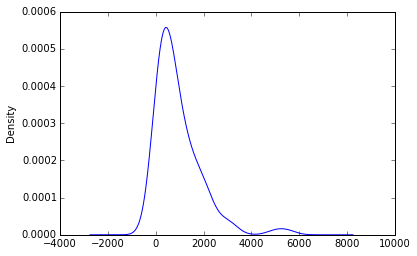

In [13]:
data.Fee_amount.plot(kind = "kde")

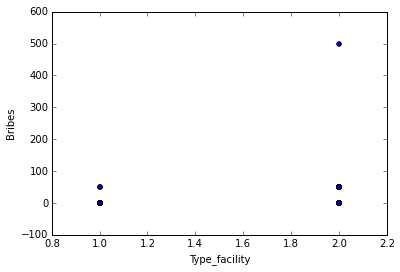

In [41]:
#plt.scatter(data["Type_facility"].fillna("None").values, data.Bribes.fillna(0).values)
map_facility = {"Type_facility": {"Private":1, "Government":2, "None":3}}
pd.set_option("display.max_columns", 100)
#data.replace(map_facility, inplace = True)
data[['Type_facility', 'Bribes']].plot(kind = "scatter", x = "Type_facility", y = "Bribes")

In [21]:
data["Type_facility"].fillna("None")

0         Private
1      Government
2      Government
3      Government
4         Private
5         Private
6      Government
7      Government
8         Private
9         Private
10        Private
11        Private
12        Private
13     Government
14        Private
15        Private
16        Private
17           None
18        Private
19           None
20        Private
21     Government
22     Government
23        Private
24     Government
25        Private
26        Private
27     Government
28        Private
29           None
          ...    
169       Private
170          None
171    Government
172    Government
173       Private
174       Private
175    Government
176       Private
177    Government
178    Government
179       Private
180       Private
181       Private
182    Government
183       Private
184       Private
185    Government
186    Government
187    Government
188       Private
189       Private
190    Government
191       Private
192    Government
193       

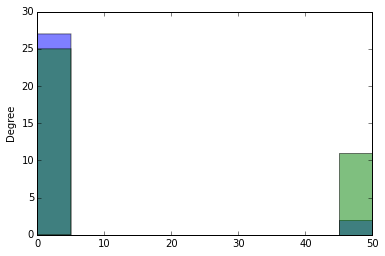

In [46]:
data[data.Type_facility == 1].Bribes.plot(kind = "hist", alpha = 0.5)
data[(data.Type_facility == 2) & (data.Bribes < 200)].Bribes.plot(kind = "hist", alpha = 0.5)

In [47]:
data.Bribes.value_counts()

0      52
50     13
500     1
dtype: int64

In [48]:
data.Bribes

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
      ... 
169    NaN
170    NaN
171    500
172      0
173      0
174      0
175     50
176      0
177      0
178     50
179     50
180      0
181      0
182      0
183      0
184      0
185    NaN
186     50
187    NaN
188    NaN
189      0
190      0
191     50
192      0
193    NaN
194      0
195    NaN
196      0
197      0
198      0
Name: Bribes, dtype: float64

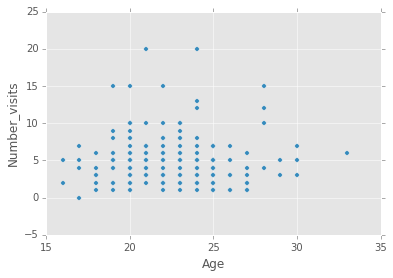

In [50]:
import matplotlib
matplotlib.style.use("ggplot")

data.plot(kind="scatter", x="Age", y="Number_visits")

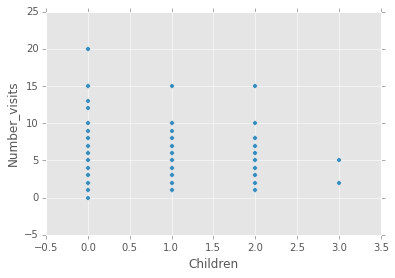

In [51]:
data.plot(kind="scatter",x="Children", y="Number_visits")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A18ADA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001B6B9D30>]], dtype=object)

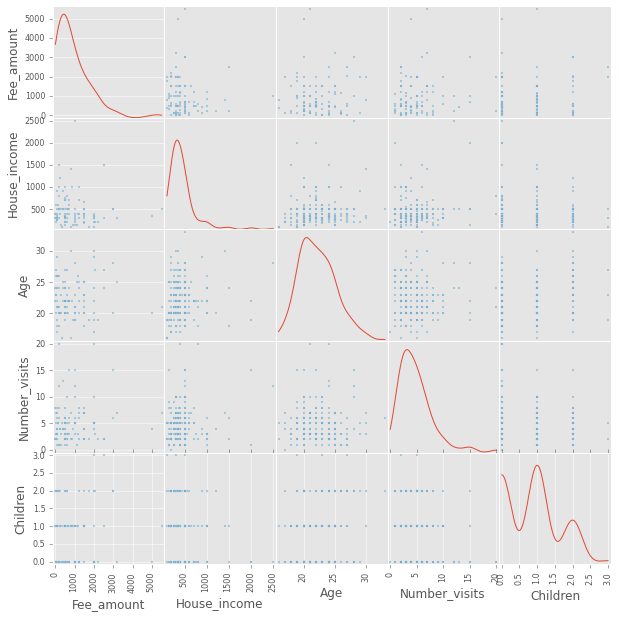

In [53]:
from pandas.tools.plotting import scatter_matrix
subset = data[["Fee_amount", "House_income", "Age", "Number_visits", "Children"]]
scatter_matrix(subset, figsize=(10,10), diagonal="kde")

In [54]:
data.Switched_facility.value_counts()

No                  100
Yes                  27
Delivered            23
Away                  8
No prenatal care      7
dtype: int64

In [55]:
switched = data[data.Switched_facility.isin(["Yes", "No"])]
switched.head()

,Age,Marriage,Job,Education,Religion,Literate,Own_phone,Who_phone,Ind_income,Number_household,House_income,Children,Months_pregnant,Prenatal_care,Number_visits,First_visit,Last_visit,Date_last_visit,Return_visit,Name_facility,Type_facility,Distance_house,Referral_friend,Husband_chose,Others_chose,Low_cost,Health_workers_present,Female_provider,Other,Doctor_present,Minutes_doctor,Minutes_test,Minutes_waiting,Wait_reasonable,Type_provider,Provider_gender,Provider_treatment,Provider_issues,Provider_explain,Fee,Fee_services,Fee_amount,Bribes,Fee_reasonable,Privacy,Cleanliness,Overall,Doctor_good,Facility_clean,Had_privacy,Fees_low,Female_provider.1,Distance,Medication,Reduce_wait,Reduce_fees,Doctor_patient,Drinking_water,Facilities_clean,Other.1,Nothing_improve,Go_back_facility,Why_go_back,Aware_others,Feedback,Can_we_return,Notes,Discussed _friends,Feedback_facility,What_feedback,To_who,Return_since_last,Switched_facility,Why_no1,Why_no2,Why_no3,Quality_better,Better_reason1,Better_reason2,Quality_worse1,Quality_worse2,Discussed_husband,Discussed_other_family,Attended_quality,Other_way,Yes_how,Facility_names,Facility_again,Since_switched,Why_not,Gone_back,Name,Quality2_better,Quality2_reason,Quality2_reason2,worse_reason1,worse_reason2
3,20,Married,Housewife,Graduation,Hindu,Yes,Yes,Pregnant woman being interviewed,0,2,200,0,7,Yes,3,4,7,2014-10-07,NaN,Surya nagar hospital,2,NaN,NaN,NaN,NaN,Low cost,NaN,NaN,NaN,Yes,2,15,5,Short,Doctor,Female,Good,Yes,Yes,Yes,consulting fees,30,NaN,Minimal,Yes,Yes,Good,Doctor was good,Facility was clean,I had privacy,Fees are low,Female provider was present,Close to home,Medication was effective,NaN,NaN,NaN,NaN,NaN,NaN,Nothing needs improvement,Yes,free of cost,No,No,No response,NaN,No,No,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,No,NaN,Yes,Yes,No,Already Gone to Life Spring Mallapur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,Married,Housewife,Secondary,Muslim,Yes,Yes,Husband,230,5,2500,0,9,Yes,12,2,9,2014-10-06,NaN,Eashwar laxmi hospital,1,NaN,NaN,NaN,Other family member chose facility,NaN,NaN,NaN,NaN,Yes,10,5,20,Short,Doctor,Female,Good,Yes,Yes,Yes,"scaning.blood test, urine test, consulting fees",1000,NaN,Reasonable,Yes,Yes,Very good,Doctor was good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nothing needs improvement,Yes,"caring, treatment, privacy is good",No,No,Yes,NaN,No,Yes,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,No,No,NaN,Yes,Yes,No,Delivered at Petlaburj Hospital Mother-in-Law ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,27,Married,Housewife,Graduation,Hindu,Yes,Yes,Pregnant woman being interviewed,0,4,500,2,4,Yes,1,2,2,2014-08-23,NaN,Grace nursing home,1,NaN,NaN,NaN,Other family member chose facility,NaN,NaN,NaN,NaN,Yes,10,5,10,Short,Doctor,Female,Good,Yes,Yes,Yes,"medicine, consulting fees",600,NaN,Too much,No,Yes,Ok,Doctor was good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,privacy should be there,NaN,Yes,family members dont allow to go another hospital,Yes,No,Yes,NaN,Yes,No,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,No,No,NaN,Yes,Yes,No,Already Gone to Surya Nagar Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,22,Married,Housewife,None,Hindu,No,Yes,Brother's wife,0,3,300,1,6,Yes,3,3,6,2014-10-09,NaN,Gandhi hospital,2,NaN,NaN,NaN,NaN,Low cost,NaN,NaN,NaN,No,0,5,90,Too long,Nurse,Female,Ok,No,Yes,No,NaN,NaN,NaN,No fee,No,No,Poor,Doctor was good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,should provide one more doctor,NaN,Yes,free of cost,No,No,Yes,NaN,Yes,Yes,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,No,No,NaN,Yes,Yes,No,Family Members wants here only,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,22,Married,Housewife,Graduation,Muslim,Yes,Yes,Husband,0,3,250,1,6,Yes,5,1,5,2014-09-15,NaN,Surya nagar hospital,2,Distance from house,NaN,NaN,NaN,Low cost,NaN,NaN,NaN,Yes,10,5,60,Too long,Doctor,Female,Good,Yes,Yes,No,NaN,NaN,NaN,No fee,Yes,Yes,Good,Doctor was good,NaN,NaN,NaN,NaN,NaN,NaN,Reduce the waiting time,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Free of cost and because of financia

In [57]:
switched["Switched_facility"] = (switched.Switched_facility == "Yes").astype(float)


C:\Users\priya\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [58]:
switched.head()

,Age,Marriage,Job,Education,Religion,Literate,Own_phone,Who_phone,Ind_income,Number_household,House_income,Children,Months_pregnant,Prenatal_care,Number_visits,First_visit,Last_visit,Date_last_visit,Return_visit,Name_facility,Type_facility,Distance_house,Referral_friend,Husband_chose,Others_chose,Low_cost,Health_workers_present,Female_provider,Other,Doctor_present,Minutes_doctor,Minutes_test,Minutes_waiting,Wait_reasonable,Type_provider,Provider_gender,Provider_treatment,Provider_issues,Provider_explain,Fee,Fee_services,Fee_amount,Bribes,Fee_reasonable,Privacy,Cleanliness,Overall,Doctor_good,Facility_clean,Had_privacy,Fees_low,Female_provider.1,Distance,Medication,Reduce_wait,Reduce_fees,Doctor_patient,Drinking_water,Facilities_clean,Other.1,Nothing_improve,Go_back_facility,Why_go_back,Aware_others,Feedback,Can_we_return,Notes,Discussed _friends,Feedback_facility,What_feedback,To_who,Return_since_last,Switched_facility,Why_no1,Why_no2,Why_no3,Quality_better,Better_reason1,Better_reason2,Quality_worse1,Quality_worse2,Discussed_husband,Discussed_other_family,Attended_quality,Other_way,Yes_how,Facility_names,Facility_again,Since_switched,Why_not,Gone_back,Name,Quality2_better,Quality2_reason,Quality2_reason2,worse_reason1,worse_reason2
3,20,Married,Housewife,Graduation,Hindu,Yes,Yes,Pregnant woman being interviewed,0,2,200,0,7,Yes,3,4,7,2014-10-07,NaN,Surya nagar hospital,2,NaN,NaN,NaN,NaN,Low cost,NaN,NaN,NaN,Yes,2,15,5,Short,Doctor,Female,Good,Yes,Yes,Yes,consulting fees,30,NaN,Minimal,Yes,Yes,Good,Doctor was good,Facility was clean,I had privacy,Fees are low,Female provider was present,Close to home,Medication was effective,NaN,NaN,NaN,NaN,NaN,NaN,Nothing needs improvement,Yes,free of cost,No,No,No response,NaN,No,No,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,No,NaN,Yes,Yes,No,Already Gone to Life Spring Mallapur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,Married,Housewife,Secondary,Muslim,Yes,Yes,Husband,230,5,2500,0,9,Yes,12,2,9,2014-10-06,NaN,Eashwar laxmi hospital,1,NaN,NaN,NaN,Other family member chose facility,NaN,NaN,NaN,NaN,Yes,10,5,20,Short,Doctor,Female,Good,Yes,Yes,Yes,"scaning.blood test, urine test, consulting fees",1000,NaN,Reasonable,Yes,Yes,Very good,Doctor was good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nothing needs improvement,Yes,"caring, treatment, privacy is good",No,No,Yes,NaN,No,Yes,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,No,No,NaN,Yes,Yes,No,Delivered at Petlaburj Hospital Mother-in-Law ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,27,Married,Housewife,Graduation,Hindu,Yes,Yes,Pregnant woman being interviewed,0,4,500,2,4,Yes,1,2,2,2014-08-23,NaN,Grace nursing home,1,NaN,NaN,NaN,Other family member chose facility,NaN,NaN,NaN,NaN,Yes,10,5,10,Short,Doctor,Female,Good,Yes,Yes,Yes,"medicine, consulting fees",600,NaN,Too much,No,Yes,Ok,Doctor was good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,privacy should be there,NaN,Yes,family members dont allow to go another hospital,Yes,No,Yes,NaN,Yes,No,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,No,No,NaN,Yes,Yes,No,Already Gone to Surya Nagar Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,22,Married,Housewife,None,Hindu,No,Yes,Brother's wife,0,3,300,1,6,Yes,3,3,6,2014-10-09,NaN,Gandhi hospital,2,NaN,NaN,NaN,NaN,Low cost,NaN,NaN,NaN,No,0,5,90,Too long,Nurse,Female,Ok,No,Yes,No,NaN,NaN,NaN,No fee,No,No,Poor,Doctor was good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,should provide one more doctor,NaN,Yes,free of cost,No,No,Yes,NaN,Yes,Yes,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,No,No,NaN,Yes,Yes,No,Family Members wants here only,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,22,Married,Housewife,Graduation,Muslim,Yes,Yes,Husband,0,3,250,1,6,Yes,5,1,5,2014-09-15,NaN,Surya nagar hospital,2,Distance from house,NaN,NaN,NaN,Low cost,NaN,NaN,NaN,Yes,10,5,60,Too long,Doctor,Female,Good,Yes,Yes,No,NaN,NaN,NaN,No fee,Yes,Yes,Good,Doctor was good,NaN,NaN,NaN,NaN,NaN,NaN,Reduce the waiting time,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Free of cost and because of financial pr

In [67]:
switched.dtypes
var_columns = ["Age", "House_income", "Months_pregnant", "Number_visits", "Type_facility", 
               "Children", "First_visit", "Last_visit", "Minutes_doctor", "Minutes_waiting"]

switched_clean = switched[var_columns + ["Switched_facility"]]
switched_clean.dropna(inplace = True)
logit = sm.Logit(switched_clean.Switched_facility, switched_clean[var_columns])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.462575
         Iterations 6


C:\Users\priya\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [68]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Switched_facility   No. Observations:                  123
Model:                          Logit   Df Residuals:                      113
Method:                           MLE   Df Model:                            9
Date:                Sat, 08 Aug 2015   Pseudo R-squ.:                 0.08379
Time:                        15:38:57   Log-Likelihood:                -56.897
converged:                       True   LL-Null:                       -62.100
                                        LLR p-value:                    0.3186
===================================================================================
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Age                -0.1177      0.059     -1.998      0.046        -0.233    -0.002
House_income       -0.0010      0.001     -0.760      0.448        -0.004     0.002
Months_pregnant     0.1619      0.143      1.130      0.258        -0.119     0.443
Number_visits      -0.1254      0.162     -0.774      0.439        -0.443     0.192
Type_facility       0.5609      0.484      1.160      0.246        -0.387     1.509
Children            0.5292      0.321      1.648      0.099        -0.100     1.158
First_visit         0.0976      0.254      0.384      0.701        -0.400     0.596
Last_visit          0.0255      0.215      0.119      0.906        -0.396     0.447
Minutes_doctor     -0.0209      0.025     -0.833      0.405        -0.070     0.028
Minutes_waiting    -0.0043      0.004     -1.093      0.274        -0.012     0.003
===================================================================================
"""

In [66]:
switched[var_columns].dropna()

,Age,House_income,Months_pregnant,Number_visits,Type_facility,Children,First_visit,Last_visit,Minutes_doctor,Minutes_waiting
3,20,200,7,3,2,0,4,7,2,5
4,28,2500,9,12,1,0,2,9,10,20
5,27,500,4,1,1,2,2,2,10,10
6,22,300,6,3,2,1,3,6,0,90
7,22,250,6,5,2,1,1,5,10,60
8,21,250,7,4,1,0,3,7,15,30
9,20,500,8,4,1,1,2,6,15,30
10,22,500,4,2,1,0,3,4,60,120
12,27,308,8,2,1,3,5,7,15,180
13,25,200,7,2,2,0,2,6,15,60


In [70]:
switched_clean.index

Int64Index([  3,   4,   5,   6,   7,   8,   9,  10,  12,  13, 
            ...
            187, 188, 189, 190, 191, 193, 194, 195, 197, 198],
           dtype='int64', length=123)

In [78]:
test_index = np.random.choice(switched_clean.index, size=0.2*len(switched_clean.index), replace = False)
test = switched_clean.loc[test_index]
train = switched_clean.drop(test_index)
logit = sm.Logit(train.Switched_facility, train[var_columns])
result = logit.fit()
















Optimization terminated successfully.
         Current function value: 0.480576
         Iterations 6


In [77]:
print test.shape
print train.shape

(24, 11)
(99, 11)


In [80]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Switched_facility   No. Observations:                   99
Model:                          Logit   Df Residuals:                       89
Method:                           MLE   Df Model:                            9
Date:                Sat, 08 Aug 2015   Pseudo R-squ.:                 0.04494
Time:                        15:55:27   Log-Likelihood:                -47.577
converged:                       True   LL-Null:                       -49.816
                                        LLR p-value:                    0.8773
===================================================================================
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Age                -0.0530      0.065     -0.817      0.414        -0.180     0.074
House_income       -0.0005      0.001     -0.349      0.727        -0.003     0.002
Months_pregnant     0.0744      0.157      0.475      0.635        -0.232     0.381
Number_visits      -0.1302      0.170     -0.768      0.443        -0.463     0.202
Type_facility       0.2379      0.536      0.444      0.657        -0.813     1.288
Children            0.3334      0.349      0.954      0.340        -0.352     1.018
First_visit         0.0784      0.292      0.268      0.788        -0.494     0.651
Last_visit          0.0143      0.224      0.064      0.949        -0.425     0.453
Minutes_doctor     -0.0296      0.028     -1.075      0.282        -0.084     0.024
Minutes_waiting    -0.0052      0.005     -1.124      0.261        -0.014     0.004
===================================================================================
"""

In [84]:
preds = result.predict(test[var_columns])

In [86]:
pd.DataFrame([test.Switched_facility.values, preds]).T

,0,1
0,1,0.359124
1,0,0.279194
2,0,0.357265
3,0,0.154855
4,0,0.263000
5,1,0.118678
6,0,0.084458
7,0,0.214684
8,0,0.149877
9,1,0.272164


In [87]:
preds_binary = (preds> 0.35).astype(float)

In [88]:
preds_binary

array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [89]:
pd.DataFrame([test.Switched_facility.values, preds_binary]).T

,0,1
0,1,1
1,0,0
2,0,1
3,0,0
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,1,0
